In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa?

In [3]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [4]:
y_pred = per_clf.predict([[2, 0.5]])

In [5]:

print(y_pred)

[0]


In [6]:
import tensorflow as tf


In [7]:
from tensorflow import keras
tf.__version__


'2.3.0'

In [8]:
keras.__version__

'2.4.0'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
 X_train_full.shape


(60000, 28, 28)

In [11]:
 X_train_full.dtype

dtype('uint8')

In [12]:
y_train_full.shape

(60000,)

In [13]:
y_train_full.dtype

dtype('uint8')

In [14]:
 X_test.shape


(10000, 28, 28)

In [15]:
X_test.dtype

dtype('uint8')

In [16]:
y_test.shape

(10000,)

In [17]:
#Scale dow the pixel intensity of the images to allow for differentiation
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [18]:
#provide the class names to enable during the prediction
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [19]:
#Check out the first image
class_names[y_train[0]]


'Coat'

In [20]:
#Create the model and pass them as a list using the sequential API
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

In [21]:
#Check the model summarry
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Fetch a models list of layers 
model.layers

In [23]:
#Get the parameters of a hidden layer
hidden1 = model.layers[1]

In [24]:
#Access the paameters of a layer
weights, biases = hidden1.get_weights()
weights

array([[ 0.00976637,  0.02170264, -0.0562014 , ...,  0.06819333,
         0.07025658, -0.03838323],
       [ 0.02986127,  0.03914679, -0.02038771, ...,  0.07284723,
         0.00312492, -0.0685208 ],
       [-0.06937216, -0.0153704 ,  0.0266524 , ...,  0.04666803,
        -0.01787562, -0.00679967],
       ...,
       [ 0.02397888,  0.00042555,  0.059512  , ..., -0.03174476,
        -0.02685637,  0.03368516],
       [ 0.05030499,  0.01564661,  0.04001557, ..., -0.071205  ,
        -0.01112543,  0.05018053],
       [ 0.02525648, -0.03272916,  0.05141927, ...,  0.02859607,
        -0.00349209,  0.04600167]], dtype=float32)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
weights.shape

(784, 300)

In [27]:
weights.dtype

dtype('float32')

In [28]:
biases.shape

(300,)

In [29]:
#Compile the model
'''After creating the network we compile it or put it together witht the 
loss and optimizer'''
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
              optimizer = keras.optimizers.SGD(lr=0.01),
             metrics = ["accuracy"])

In [30]:
#Training and evaluating the model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7232 - accuracy: 0.7591 - val_loss: 0.5385 - val_accuracy: 0.8152
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4876 - accuracy: 0.8306 - val_loss: 0.4520 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4431 - accuracy: 0.8457 - val_loss: 0.4155 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4162 - accuracy: 0.8543 - val_loss: 0.4045 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3961 - accuracy: 0.8601 - val_loss: 0.3880 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3795 - accuracy: 0.8661 - val_loss: 0.3701 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3652 - accuracy: 0.8698 - val_loss: 0.3713 - val_accuracy:

In [31]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
history.history

{'loss': [0.723244309425354,
  0.48760902881622314,
  0.4430721700191498,
  0.41623377799987793,
  0.3960886001586914,
  0.3794933557510376,
  0.3651648759841919,
  0.35397177934646606,
  0.3428725600242615,
  0.3335082530975342,
  0.32599860429763794,
  0.317703515291214,
  0.31007423996925354,
  0.3045073449611664,
  0.297292023897171,
  0.2906976640224457,
  0.28544700145721436,
  0.27946844696998596,
  0.2741415202617645,
  0.2688685357570648,
  0.26434358954429626,
  0.2593529522418976,
  0.25495606660842896,
  0.25020426511764526,
  0.245167538523674,
  0.24187251925468445,
  0.23718054592609406,
  0.23365844786167145,
  0.2287752628326416,
  0.22656521201133728],
 'accuracy': [0.7591454386711121,
  0.8306363821029663,
  0.8457454442977905,
  0.854345440864563,
  0.8600727319717407,
  0.8661454319953918,
  0.8697817921638489,
  0.8739272952079773,
  0.8776363730430603,
  0.8808545470237732,
  0.8831818103790283,
  0.8867090940475464,
  0.8894000053405762,
  0.8900363445281982,
  

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

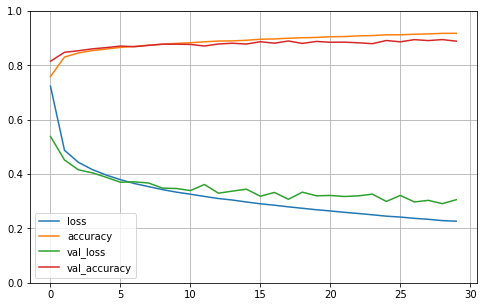

In [34]:
#plot the history of the model.fit
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [35]:
#Evaluaing the model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 54.4641 - accuracy: 0.8615


[54.464107513427734, 0.8615000247955322]

In [36]:
#prediction using the model
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
#Choos on the class with the hieghest probabilities
y_pred = model.predict_classes(X_new)
y_pred


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [38]:
np.argmax(model.predict(X_new), axis=-1)

array([9, 2, 1], dtype=int64)

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Regression of MLP using Sequential API

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
#load the data from sklearn
housing = fetch_california_housing()

In [42]:
#Slit the data to train test and validation
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

In [43]:
#Scale the data into the same range
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [44]:
X_train.shape

(11610, 8)

In [45]:
y_train.shape

(11610,)

In [46]:
X_train.dtype

dtype('float64')

In [47]:
#Create the model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",
    input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])


In [48]:
hidden = model.layers[1]
hidden

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [50]:
#Compile the model
model.compile(loss="mean_squared_error", optimizer="sgd")

In [51]:
historyr = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 860us/step - loss: 0.8228 - val_loss: 0.6631
Epoch 2/20
363/363 [==============================] - 0s 615us/step - loss: 0.9947 - val_loss: 0.4287
Epoch 3/20
363/363 [==============================] - 0s 621us/step - loss: 0.4409 - val_loss: 0.4110
Epoch 4/20
363/363 [==============================] - 0s 603us/step - loss: 0.4130 - val_loss: 0.3947
Epoch 5/20
363/363 [==============================] - 0s 594us/step - loss: 0.4020 - val_loss: 0.3881
Epoch 6/20
363/363 [==============================] - 0s 595us/step - loss: 0.3906 - val_loss: 0.3828
Epoch 7/20
363/363 [==============================] - 0s 606us/step - loss: 0.3874 - val_loss: 0.3730
Epoch 8/20
363/363 [==============================] - 0s 603us/step - loss: 0.3822 - val_loss: 0.3715
Epoch 9/20
363/363 [==============================] - 0s 595us/step - loss: 0.3782 - val_loss: 0.3662
Epoch 10/20
363/363 [==============================] - 0s 601us/step - loss: 0.380

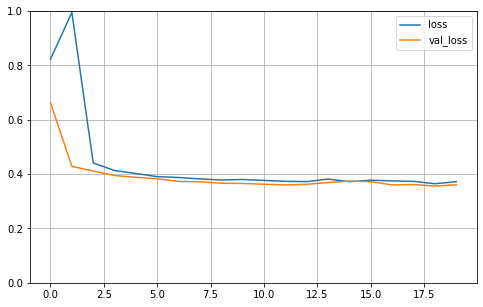

In [52]:
#plot the history of the model.fit
pd.DataFrame(historyr.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [53]:
#Evaluate the model on the test set
mse_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 432us/step - loss: 0.3449


In [54]:
#Test the model on data
X_new = X_test[:3] # pretend these are new instances
X_new

array([[-1.24039684,  1.85651052, -1.18479864,  0.02780479,  0.21868947,
        -0.0656273 ,  0.9898174 , -1.39763271],
       [-0.91035159,  0.03006794,  0.14425004,  0.13287403, -1.03794125,
        -0.11151379,  0.24129929, -0.41326442],
       [-0.64933199,  0.18888903, -0.38193366, -0.04918619,  0.06994543,
         0.18199835, -1.13950741,  1.10306047]])

In [55]:
#predict the test
y_pred = model.predict(X_new)
y_pred

array([[2.5166304],
       [1.3444132],
       [1.4404359]], dtype=float32)

In [56]:
y_test[:3]

array([2.375, 1.042, 1.033])

### Functional API

In [57]:
#A simple functional API under one path
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
modelu = keras.Model(inputs=[input_], outputs=[output])

In [58]:
#In other instances we need to create an API where two inputs exist
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
modelu = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [59]:
#Compile model
modelu.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [60]:
#Redifining the inputs due to the two channels
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]


In [61]:
#Fitting the model
historyu = modelu.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 0s 938us/step - loss: 1.8110 - val_loss: 0.8136
Epoch 2/20
363/363 [==============================] - 0s 674us/step - loss: 0.7408 - val_loss: 0.6811
Epoch 3/20
363/363 [==============================] - 0s 669us/step - loss: 0.6561 - val_loss: 0.6382
Epoch 4/20
363/363 [==============================] - 0s 661us/step - loss: 0.6240 - val_loss: 0.6134
Epoch 5/20
363/363 [==============================] - 0s 654us/step - loss: 0.6014 - val_loss: 0.5943
Epoch 6/20
363/363 [==============================] - 0s 695us/step - loss: 0.5819 - val_loss: 0.5775
Epoch 7/20
363/363 [==============================] - 0s 687us/step - loss: 0.5688 - val_loss: 0.5633
Epoch 8/20
363/363 [==============================] - 0s 675us/step - loss: 0.5545 - val_loss: 0.5537
Epoch 9/20
363/363 [==============================] - 0s 658us/step - loss: 0.5454 - val_loss: 0.5416
Epoch 10/20
363/363 [==============================] - 0s 646us/step - loss: 0.532

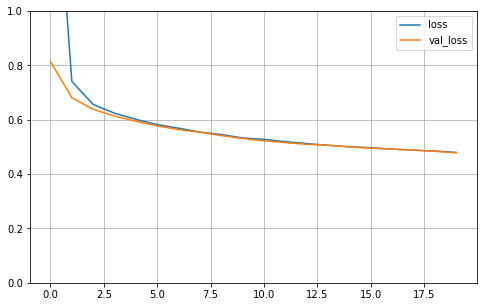

In [62]:
#plot the history of the model.fit
pd.DataFrame(historyu.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [63]:
#Testing the model
mse_test = modelu.evaluate((X_test_A, X_test_B), y_test)


162/162 [==============================] - 0s 483us/step - loss: 0.4486


In [64]:
#predict the model
y_pred = modelu.predict((X_new_A, X_new_B))
y_pred

array([[2.4557106],
       [1.4307215],
       [1.5549419]], dtype=float32)

In [65]:
y_test[:3]

array([2.375, 1.042, 1.033])

NameError: name 'y_train_B' is not defined

##### Adding Auxilliary outputs for regularization


In [67]:
#Adding Auxilliary output
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
modelf = keras.Model(inputs=[input_A, input_B], outputs=[output,
aux_output])

In [68]:
#When compiling pass different losses and weight more on the main output
modelf.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],
optimizer="sgd")

In [69]:
#model_fit
historyf = modelf.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0116 - main_output_loss: 0.8646 - aux_output_loss: 2.3339 - val_loss: 0.6611 - val_main_output_loss: 0.5804 - val_aux_output_loss: 1.3870
Epoch 2/20
363/363 [==============================] - 0s 768us/step - loss: 0.6224 - main_output_loss: 0.5501 - aux_output_loss: 1.2735 - val_loss: 0.5650 - val_main_output_loss: 0.5010 - val_aux_output_loss: 1.1409
Epoch 3/20
363/363 [==============================] - 0s 790us/step - loss: 0.5691 - main_output_loss: 0.5104 - aux_output_loss: 1.0971 - val_loss: 0.5184 - val_main_output_loss: 0.4642 - val_aux_output_loss: 1.0064
Epoch 4/20
363/363 [==============================] - 0s 763us/step - loss: 0.5270 - main_output_loss: 0.4793 - aux_output_loss: 0.9561 - val_loss: 0.4927 - val_main_output_loss: 0.4496 - val_aux_output_loss: 0.8802
Epoch 5/20
363/363 [==============================] - 0s 763us/step - loss: 0.4908 - main_output_loss: 0.4517 - aux_output_loss: 0.8426 - 

In [70]:
historyf.history

{'loss': [1.0115625858306885,
  0.6224434971809387,
  0.5690937638282776,
  0.5269901752471924,
  0.49083396792411804,
  0.46922069787979126,
  0.4554796814918518,
  0.4492340683937073,
  0.45337915420532227,
  0.4312710762023926,
  0.4211241602897644,
  0.41723448038101196,
  0.40855446457862854,
  0.40198424458503723,
  0.3959978520870209,
  0.3911108374595642,
  0.38691142201423645,
  0.38510364294052124,
  0.43987059593200684,
  0.3764222264289856],
 'main_output_loss': [0.8646413683891296,
  0.5501087307929993,
  0.5104249715805054,
  0.4793145954608917,
  0.45174440741539,
  0.4363628327846527,
  0.4273177981376648,
  0.42433857917785645,
  0.4321027994155884,
  0.41011741757392883,
  0.4007161855697632,
  0.39675602316856384,
  0.38953733444213867,
  0.3833661675453186,
  0.37758296728134155,
  0.373115211725235,
  0.36959385871887207,
  0.3687284290790558,
  0.42965054512023926,
  0.3612624406814575],
 'aux_output_loss': [2.333862781524658,
  1.2734559774398804,
  1.09711337089

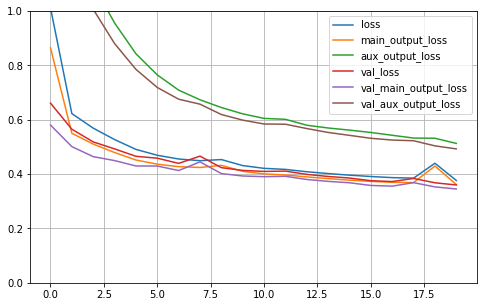

In [71]:
#plot the history of the model.fit
pd.DataFrame(historyf.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [72]:
#Evaluate the model. We get the total, main and auxilliary loss
total_loss, main_loss, aux_loss = modelf.evaluate(
[X_test_A, X_test_B], [y_test, y_test])


162/162 [==============================] - 0s 587us/step - loss: 0.3481 - main_output_loss: 0.3358 - aux_output_loss: 0.4584


In [73]:
#Test the model on data
X_new_A = X_test_A[:3] # pretend these are new instances
X_new_A

array([[-1.24039684,  1.85651052, -1.18479864,  0.02780479,  0.21868947],
       [-0.91035159,  0.03006794,  0.14425004,  0.13287403, -1.03794125],
       [-0.64933199,  0.18888903, -0.38193366, -0.04918619,  0.06994543]])

In [74]:
#Test the model on data
X_new_B = X_test_B[:3] # pretend these are new instances
X_new_B

array([[-1.18479864,  0.02780479,  0.21868947, -0.0656273 ,  0.9898174 ,
        -1.39763271],
       [ 0.14425004,  0.13287403, -1.03794125, -0.11151379,  0.24129929,
        -0.41326442],
       [-0.38193366, -0.04918619,  0.06994543,  0.18199835, -1.13950741,
         1.10306047]])

In [75]:
#prediction of the model
y_pred_main, y_pred_aux = modelf.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

(array([[2.4512868],
        [1.3030148],
        [1.0943751]], dtype=float32),
 array([[2.0715942],
        [2.1153216],
        [1.2926044]], dtype=float32))

In [76]:
#Compare on the test data
y_test[:3]

array([2.375, 1.042, 1.033])

### Subclassing API

In [77]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
models = WideAndDeepModel()

In [78]:
#When compiling pass different losses and weight more on the main output
models.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],
optimizer="sgd")

In [79]:
#model_fit
historys = models.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9643 - output_1_loss: 0.8519 - output_2_loss: 1.9753 - val_loss: 0.6162 - val_output_1_loss: 0.5390 - val_output_2_loss: 1.3108
Epoch 2/20
363/363 [==============================] - 0s 785us/step - loss: 0.5890 - output_1_loss: 0.5178 - output_2_loss: 1.2296 - val_loss: 0.5454 - val_output_1_loss: 0.4859 - val_output_2_loss: 1.0808
Epoch 3/20
363/363 [==============================] - 0s 785us/step - loss: 0.5311 - output_1_loss: 0.4757 - output_2_loss: 1.0290 - val_loss: 0.5031 - val_output_1_loss: 0.4562 - val_output_2_loss: 0.9258
Epoch 4/20
363/363 [==============================] - 0s 790us/step - loss: 0.4980 - output_1_loss: 0.4542 - output_2_loss: 0.8924 - val_loss: 0.4729 - val_output_1_loss: 0.4344 - val_output_2_loss: 0.8192
Epoch 5/20
363/363 [==============================] - 0s 776us/step - loss: 0.4759 - output_1_loss: 0.4402 - output_2_loss: 0.7974 - val_loss: 0.4556 - val_output_1_loss: 0.4230 

In [80]:
historys.history

{'loss': [0.9642778038978577,
  0.5889749526977539,
  0.5310696363449097,
  0.49800267815589905,
  0.47590628266334534,
  0.45993760228157043,
  0.4783773124217987,
  0.48153090476989746,
  0.4392613172531128,
  0.4314245879650116,
  0.42934688925743103,
  0.4205339848995209,
  0.4127883315086365,
  0.40629953145980835,
  0.4037931263446808,
  0.40255987644195557,
  0.40179532766342163,
  0.3888910710811615,
  0.38532888889312744,
  0.3821048438549042],
 'output_1_loss': [0.8519364595413208,
  0.5177897810935974,
  0.47574812173843384,
  0.45417675375938416,
  0.44018393754959106,
  0.4289470314979553,
  0.4511833190917969,
  0.45879045128822327,
  0.414529412984848,
  0.408362478017807,
  0.4071786105632782,
  0.3991197943687439,
  0.39281409978866577,
  0.38668563961982727,
  0.38531291484832764,
  0.3848583996295929,
  0.3850588798522949,
  0.3723568320274353,
  0.3693336248397827,
  0.36647698283195496],
 'output_2_loss': [1.9753490686416626,
  1.2296403646469116,
  1.0289645195007

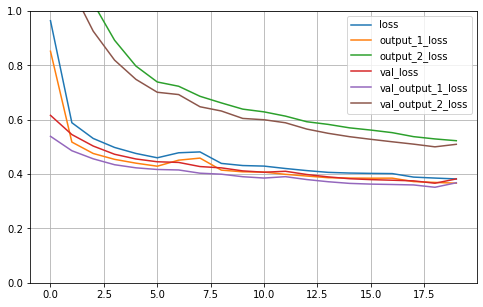

In [81]:
#plot the history of the model.fit
pd.DataFrame(historys.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [82]:
#Evaluate the model. We get the total, main and auxilliary loss
total_loss, main_loss, aux_loss = models.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 544us/step - loss: 0.3552 - output_1_loss: 0.3418 - output_2_loss: 0.4753


In [83]:
#Saving the functionl API Model
model.save("sequential_model.h5")
modelf.save("functional_model.h5")
modelu.save("functional_model_auxilliary.h5")

### Using Callbacks

In [84]:
#Import the saved model
checkpoint_cb = keras.callbacks.ModelCheckpoint("functional_model_auxilliary.h5")

In [85]:
#Obtain the history by calling back the checkpoiints
history = model.fit(X_train, y_train, epochs=10, callbacks=
[checkpoint_cb])


Epoch 1/10
363/363 [==============================] - 0s 515us/step - loss: 0.3733
Epoch 2/10
363/363 [==============================] - 0s 522us/step - loss: 0.3643
Epoch 3/10
363/363 [==============================] - 0s 530us/step - loss: 0.3676
Epoch 4/10
363/363 [==============================] - 0s 501us/step - loss: 0.3634
Epoch 5/10
363/363 [==============================] - 0s 558us/step - loss: 0.3622
Epoch 6/10
363/363 [==============================] - 0s 551us/step - loss: 0.3562
Epoch 7/10
363/363 [==============================] - 0s 551us/step - loss: 0.3559
Epoch 8/10
363/363 [==============================] - 0s 524us/step - loss: 0.3546
Epoch 9/10
363/363 [==============================] - 0s 518us/step - loss: 0.3543
Epoch 10/10
363/363 [==============================] - 0s 579us/step - loss: 0.3522


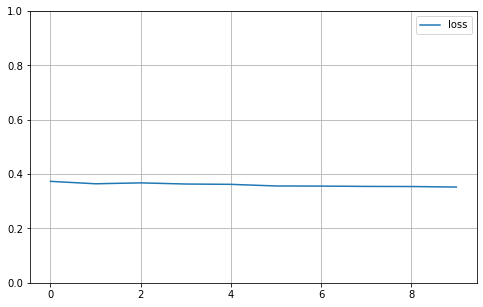

In [86]:
#plot the history of the model.fit
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [87]:
#Incase you used the validation set save_best_only() saves the model when validation perfomes the best
checkpoint_cb = keras.callbacks.ModelCheckpoint("functional_model_auxilliary.h5",save_best_only=True)

In [88]:
history = model.fit(X_train, y_train, epochs=10,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb])


Epoch 1/10
363/363 [==============================] - 0s 809us/step - loss: 0.3578 - val_loss: 0.3669
Epoch 2/10
363/363 [==============================] - 0s 675us/step - loss: 0.3557 - val_loss: 0.3494
Epoch 3/10
363/363 [==============================] - 0s 662us/step - loss: 0.3519 - val_loss: 0.3484
Epoch 4/10
363/363 [==============================] - 0s 667us/step - loss: 0.3480 - val_loss: 0.3450
Epoch 5/10
363/363 [==============================] - 0s 618us/step - loss: 0.3477 - val_loss: 0.3520
Epoch 6/10
363/363 [==============================] - 0s 597us/step - loss: 0.3449 - val_loss: 0.3452
Epoch 7/10
363/363 [==============================] - 0s 608us/step - loss: 0.3479 - val_loss: 0.3453
Epoch 8/10
363/363 [==============================] - 0s 606us/step - loss: 0.3476 - val_loss: 0.3471
Epoch 9/10
363/363 [==============================] - 0s 644us/step - loss: 0.3443 - val_loss: 0.3415
Epoch 10/10
363/363 [==============================] - 0s 615us/step - loss: 0.345

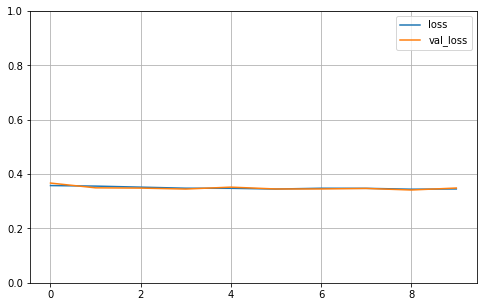

In [89]:
#plot the history of the model.fit
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [90]:
#To roll bac to the best model we use;
model = keras.models.load_model("functional_model_auxilliary.h5")

In [91]:
#Apply early stopping in case of no change in the validation set
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)


In [92]:
history = model.fit(X_train, y_train, epochs=300,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/300
363/363 [==============================] - 0s 865us/step - loss: 0.3443 - val_loss: 0.3455
Epoch 2/300
363/363 [==============================] - 0s 634us/step - loss: 0.3464 - val_loss: 0.3440
Epoch 3/300
363/363 [==============================] - 0s 666us/step - loss: 0.3414 - val_loss: 0.3383
Epoch 4/300
363/363 [==============================] - 0s 619us/step - loss: 0.3390 - val_loss: 0.3408
Epoch 5/300
363/363 [==============================] - 0s 614us/step - loss: 0.3403 - val_loss: 0.3390
Epoch 6/300
363/363 [==============================] - 0s 617us/step - loss: 0.3387 - val_loss: 0.3386
Epoch 7/300
363/363 [==============================] - 0s 624us/step - loss: 0.3374 - val_loss: 0.3501
Epoch 8/300
363/363 [==============================] - 0s 630us/step - loss: 0.3375 - val_loss: 0.3435
Epoch 9/300
363/363 [==============================] - 0s 704us/step - loss: 0.3367 - val_loss: 0.3374
Epoch 10/300
363/363 [==============================] - 0s 636us/step - l

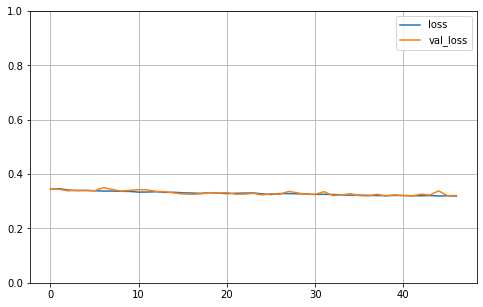

In [93]:
#plot the history of the model.fit
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [94]:
#Implementing a personal call back training
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] /logs["loss"]))


### Tensorboard

In [95]:
#Creating the root directory where tensorboard writes the logs
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [96]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22

In [97]:
#Callback provided by tebsor board 
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [98]:
history = model.fit(X_train, y_train, epochs=30,
validation_data=(X_valid, y_valid),
callbacks=[tensorboard_cb])


Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 0.4575WARNING:tensorflow:From C:\Users\Rogers\anaconda3\envs\tb\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 2ms/step - loss: 0.3211 - val_loss: 0.3232
Epoch 2/30
363/363 [==============================] - 0s 860us/step - loss: 0.3203 - val_loss: 0.3220
Epoch 3/30
363/363 [==============================] - 0s 820us/step - loss: 0.3233 - val_loss: 0.3298
Epoch 4/30
363/363 [==============================] - 0s 841us/step - loss: 0.3236 - val_loss: 0.3263
Epoch 5/30
363/363 [==============================] - 0s 869us/step - loss: 0.3216 - val_loss: 0.3232
Epoch 6/30
363/363 [==============================] - 0s 838us/step - loss: 0.3190 - val_loss: 0.3297
Epoch 7/30
363/363 [==============

In [99]:
%reload_ext tensorboard
%tensorboard --logdir=./Documents/Projects/my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 17876), started 0:40:58 ago. (Use '!kill 17876' to kill it.)

In [100]:
cd

C:\Users\Rogers


In [101]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " +str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi *
        step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [102]:
history = model.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[tensorboard_cb])


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3151 - val_loss: 0.3186
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3154 - val_loss: 0.3158
Epoch 3/100
363/363 [==============================] - 0s 799us/step - loss: 0.3155 - val_loss: 0.3193
Epoch 4/100
363/363 [==============================] - 0s 834us/step - loss: 0.3153 - val_loss: 0.3178
Epoch 5/100
363/363 [==============================] - 0s 845us/step - loss: 0.3147 - val_loss: 0.3215
Epoch 6/100
363/363 [==============================] - 0s 833us/step - loss: 0.3154 - val_loss: 0.3185
Epoch 7/100
363/363 [==============================] - 0s 901us/step - loss: 0.3148 - val_loss: 0.3198
Epoch 8/100
363/363 [==============================] - 0s 864us/step - loss: 0.3147 - val_loss: 0.3172
Epoch 9/100
363/363 [==============================] - 0s 839us/step - loss: 0.3144 - val_loss: 0.3158
Epoch 10/100
363/363 [==============================] - 0s 834us/step - loss:

363/363 [==============================] - 0s 728us/step - loss: 0.3100 - val_loss: 0.3170
Epoch 78/100
363/363 [==============================] - 0s 728us/step - loss: 0.3077 - val_loss: 0.3128
Epoch 79/100
363/363 [==============================] - 0s 729us/step - loss: 0.3064 - val_loss: 0.3117
Epoch 80/100
363/363 [==============================] - 0s 839us/step - loss: 0.3088 - val_loss: 0.3149
Epoch 81/100
363/363 [==============================] - 0s 731us/step - loss: 0.3051 - val_loss: 0.3141
Epoch 82/100
363/363 [==============================] - 0s 728us/step - loss: 0.3071 - val_loss: 0.3116
Epoch 83/100
363/363 [==============================] - 0s 811us/step - loss: 0.3071 - val_loss: 0.3152
Epoch 84/100
363/363 [==============================] - 0s 729us/step - loss: 0.3053 - val_loss: 0.3090
Epoch 85/100
363/363 [==============================] - 0s 797us/step - loss: 0.3060 - val_loss: 0.3195
Epoch 86/100
363/363 [==============================] - 0s 792us/step - loss:

### Transfer Learning

In [103]:
#import model A intitilly traned sequential moel
model_A = keras.models.load_model("sequential_model.h5")

In [104]:
cd

C:\Users\Rogers


In [105]:
#remove the output layer on model A
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])

In [106]:
#Add an output layer on the new model due to the new task
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [107]:
#Clone model A achitecture and weight to avoid destroying the model
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [108]:
#Setting the layers untrainable to avoid errors in running due to the random new output
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

In [109]:
#Must always compile the model after freezing/unfreezing the layer
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",
metrics=["accuracy"])

In [110]:
#Train the model again
history = model_B_on_A.fit(X_train_B, y_train, epochs=4,
validation_data=(X_valid_B, y_valid))


Epoch 1/4


ValueError: in user code:

    C:\Users\Rogers\anaconda3\envs\tb\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Rogers\anaconda3\envs\tb\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Rogers\anaconda3\envs\tb\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Rogers\anaconda3\envs\tb\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Rogers\anaconda3\envs\tb\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Rogers\anaconda3\envs\tb\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Rogers\anaconda3\envs\tb\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Rogers\anaconda3\envs\tb\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Rogers\anaconda3\envs\tb\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape [None, 6]
